In [284]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   
from tensorflow.keras.models import load_model

In [285]:
data = pd.read_csv("data.csv")
data

,thu nhập,cố định,nhu cầu,giáo dục,thanh toán nợ,tiết kiệm,bản thân,a,b,c,d,e,f
0,34200000,5100000,0,1,10400000,1,1,0.15,0.17,0.20,0.16,0.30,0.02
1,33100000,5000000,0,1,8800000,1,1,0.15,0.20,0.18,0.17,0.27,0.03
2,33800000,6300000,0,1,8100000,1,1,0.19,0.15,0.16,0.20,0.24,0.06
3,34700000,5900000,0,1,11800000,1,1,0.17,0.15,0.17,0.16,0.34,0.01
4,33700000,5600000,0,1,9200000,1,1,0.17,0.16,0.19,0.16,0.27,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,18100000,10000000,2,1,2000000,0,1,0.55,0.07,0.11,0.13,0.12,0.02
2746,19700000,9700000,2,1,3000000,0,0,0.49,0.06,0.10,0.11,0.16,0.08
2747,18700000,10300000,2,0,3000000,0,0,0.55,0.06,0.11,0.08,0.16,0.04
2748,16900000,8900000,2,0,0,1,1,0.53,0.08,0.15,0.11,0.01,0.12


In [286]:
data.isnull().sum()

thu nhập         0
cố định          0
nhu cầu          0
giáo dục         0
thanh toán nợ    0
tiết kiệm        0
bản thân         0
a                0
b                0
c                0
d                0
e                0
f                0
dtype: int64

In [287]:
X = np.array(data)[:,0:7]
Y = np.array(data)[:,7:13]
print(X)
print(Y)

[[3.42e+07 5.10e+06 0.00e+00 ... 1.04e+07 1.00e+00 1.00e+00]
 [3.31e+07 5.00e+06 0.00e+00 ... 8.80e+06 1.00e+00 1.00e+00]
 [3.38e+07 6.30e+06 0.00e+00 ... 8.10e+06 1.00e+00 1.00e+00]
 ...
 [1.87e+07 1.03e+07 2.00e+00 ... 3.00e+06 0.00e+00 0.00e+00]
 [1.69e+07 8.90e+06 2.00e+00 ... 0.00e+00 1.00e+00 1.00e+00]
 [1.76e+07 8.60e+06 2.00e+00 ... 3.00e+06 0.00e+00 0.00e+00]]
[[0.15 0.17 0.2  0.16 0.3  0.02]
 [0.15 0.2  0.18 0.17 0.27 0.03]
 [0.19 0.15 0.16 0.2  0.24 0.06]
 ...
 [0.55 0.06 0.11 0.08 0.16 0.04]
 [0.53 0.08 0.15 0.11 0.01 0.12]
 [0.49 0.05 0.12 0.11 0.17 0.06]]


In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ", y_test.shape)


X_train:  (2200, 7)
X_test:  (550, 7)
Y_train:  (2200, 6)
Y_test:  (550, 6)


In [289]:
# Tính các giá trị thống kê cơ bản
mean = np.mean(X_train, axis=0)
median = np.median(X_train, axis=0)
std_dev = np.std(X_train, axis=0)
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)

# Tạo DataFrame từ các giá trị thống kê
statics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Std Dev': std_dev,
    'Min Value': min_val,
    'Max Value': max_val
})

# Xếp chúng thành các hàng của các cột
statics_transpose = statics_df.transpose()

# In DataFrame đã xếp
print(statics_transpose)

                      0             1         2         3             4  \
Mean       2.538458e+07  1.003402e+07  0.986818  0.516364  1.741864e+06   
Median     2.536500e+07  9.400000e+06  1.000000  1.000000  1.000000e+06   
Std Dev    8.728067e+06  3.323397e+06  0.822584  0.499732  2.476737e+06   
Min Value  1.000000e+07  4.800000e+06  0.000000  0.000000  0.000000e+00   
Max Value  4.000000e+07  2.190000e+07  2.000000  1.000000  1.400000e+07   

                  5         6  
Mean       0.534545  0.659545  
Median     1.000000  1.000000  
Std Dev    0.498805  0.473862  
Min Value  0.000000  0.000000  
Max Value  1.000000  1.000000  


In [290]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def ScalerData(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [291]:
X_train = ScalerData(X_train)
X_test = ScalerData(X_test)
print(X_train)
print(X_test)



[[-1.00647506 -0.61202991 -1.19965644 ...  0.50798147  0.93313895
   0.71846762]
 [-1.36165107 -1.09346506 -1.19965644 ... -0.2995327  -1.07165176
  -1.39185117]
 [ 1.02146536 -0.49167112 -1.19965644 ... -0.70328979  0.93313895
   0.71846762]
 ...
 [-0.18613306 -0.702299    0.01602489 ... -0.70328979  0.93313895
   0.71846762]
 [-0.29383159 -1.03930361  1.23170622 ... -0.70328979 -1.07165176
   0.71846762]
 [ 1.66307363  2.75801616  1.23170622 ...  0.6291086  -1.07165176
   0.71846762]]
[[-0.17381081  1.54061932  1.28287401 ... -0.28111274 -1.08347268
  -1.3764944 ]
 [-0.30187436  0.08312789 -1.18851199 ... -0.28111274  0.92295821
  -1.3764944 ]
 [-1.68728913 -1.50350835  1.28287401 ... -0.28111274 -1.08347268
  -1.3764944 ]
 ...
 [ 1.09518255 -0.55029666  0.04718101 ...  0.07503355 -1.08347268
   0.72648316]
 [ 1.38623607  0.0031811   0.04718101 ...  1.85576501  0.92295821
   0.72648316]
 [ 0.3151591   1.1378105  -1.18851199 ...  0.16407012  0.92295821
  -1.3764944 ]]


In [292]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def define_model():
    model = Sequential()

    # Tăng số lượng nơ-ron trong các lớp hiện có và thêm nhiều lớp ẩn hơn
    model.add(Dense(16, input_dim=7, activation='relu'))
    
    model.add(Dense(8, activation='relu'))

    model.add(Dense(8, activation='relu'))
    
    model.add(Dropout(0.1)) 

    model.add(Dense(6))  

    # Compile mô hình
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [293]:
import matplotlib.pyplot as plt

def train_and_plot_loss():
    model = define_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)
    
    # Lấy giá trị loss từ lịch sử huấn luyện
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Vẽ biểu đồ loss của cả hai tập train và validation
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')  # Đường liên tục màu xanh
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Đường liên tục màu đỏ
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/100


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1760/1760 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - loss: 0.0197 - val_loss: 0.0026
Epoch 2/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 0.0031 - val_loss: 0.0018
Epoch 3/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 0.0020 - val_loss: 0.0011
Epoch 5/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 0.0016 - val_loss: 9.1019e-04
Epoch 8/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - loss: 0.0016 - val_loss: 8.7010e-04
Epoch 9/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - loss: 0.0015 - val_loss: 8.6283e-04
Epoch 10/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 0.0015 - val_loss: 9.0397e-04
Epoch 11/100
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.0015 - val_loss: 

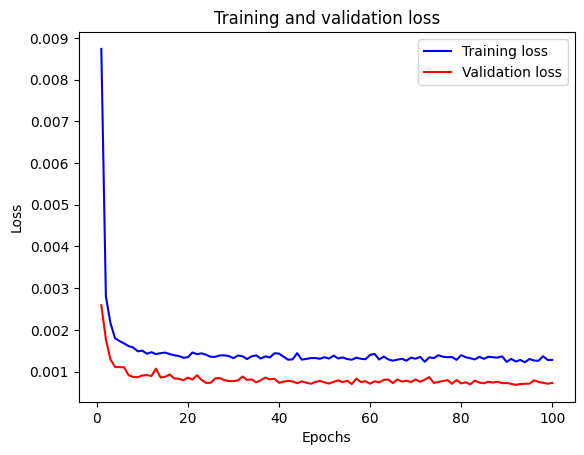

In [294]:
train_and_plot_loss()

In [295]:
import sys
import os
for i in range(0, 10):
    model = load_model("final_model.h5")
    X_test_sample = np.expand_dims(X_test[i], axis=0)
    print("Y_test_true: " + str(i) + " ", y_test[i])
    print("Y_test_predict: " + str(i) + " ", model.predict(X_test_sample))


Y_test_true: 0  [0.63 0.02 0.14 0.14 0.04 0.03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Y_test_predict: 0  [[0.5875159  0.04637407 0.13112143 0.1313449  0.04368125 0.06043345]]
Y_test_true: 1  [0.45 0.32 0.04 0.07 0.04 0.08]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Y_test_predict: 1  [[0.4409149  0.3395984  0.05713104 0.07174116 0.02673718 0.06242983]]
Y_test_true: 2  [0.47 0.06 0.08 0.16 0.1  0.13]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Y_test_predict: 2  [[0.51355195 0.07777248 0.11354931 0.12185746 0.11063074 0.06255578]]


Y_test_true: 3  [0.51 0.06 0.11 0.09 0.16 0.07]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Y_test_predict: 3  [[0.5057132  0.06564067 0.10409171 0.11202861 0.15863505 0.05386768]]
Y_test_true: 4  [0.26 0.25 0.16 0.17 0.15 0.01]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Y_test_predict: 4  [[0.2773303  0.16129568 0.18789339 0.1804524  0.1456544  0.04572037]]
Y_test_true: 5  [0.3  0.1  0.16 0.16 0.2  0.08]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Y_test_predict: 5  [[0.34062058 0.06090255 0.1717128  0.1746269  0.19418648 0.05616583]]
Y_test_true: 6  [0.34 0.17 0.23 0.17 0.   0.09]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Y_test_predict: 6  [[0.36540657 0.1585902  0.20254847 0.20142953 0.01749031 0.0537997 ]]
Y_test_true: 7  [0.5  0.26 0.09 0.09 0.   0.06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Y_test_predict: 7  [[0.48773256 0.25002405 0.07324285 0.08868168 0.03134421 0.0679246 ]]
Y_test_true: 8  [0.27 0.29 0.22 0.19 0.   0.03]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Y_test_predict: 8  [[0.29309478 0.25053224 0.20060864 0.19273204 0.01766212 0.04408305]]
Y_test_true: 9  [0.3  0.07 0.18 0.2  0.19 0.06]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Y_test_predict: 9  [[0.3377846  0.06006192 0.18750483 0.18910313 0.16823438 0.05565857]]
